# Importing packages

In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Reading data

In [2]:
data = pd.read_csv("G:/Thesis/Datasets/Combined weather-flow data/dataframe_flow_variable_60min.csv")

In [3]:
data.shape

(2208, 34)

In [4]:
data.columns

Index(['Unnamed: 0', '225', '468', '798', '1269', '1588', '1693', '2260',
       '2285', '2189', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

In [5]:
# Lets consider only 225 DMA:
data_225 = data.drop(['468','798','1269','1588','1693','2260','2285','2189'], axis = 1) 

In [6]:
data_225.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2208 non-null   object 
 1   225                2208 non-null   float64
 2   maxtempC           2208 non-null   int64  
 3   mintempC           2208 non-null   int64  
 4   totalSnow_cm       2208 non-null   float64
 5   sunHour            2208 non-null   float64
 6   uvIndex            2208 non-null   int64  
 7   moon_illumination  2208 non-null   int64  
 8   moonrise           2208 non-null   object 
 9   moonset            2208 non-null   object 
 10  sunrise            2208 non-null   object 
 11  sunset             2208 non-null   object 
 12  DewPointC          2208 non-null   int64  
 13  FeelsLikeC         2208 non-null   int64  
 14  HeatIndexC         2208 non-null   int64  
 15  WindChillC         2208 non-null   int64  
 16  WindGustKmph       2208 

In [7]:
data_225.rename( columns={'Unnamed: 0':'Timeframe','225':'DMA_225'}, inplace=True ) 

In [8]:
data_225.head(5)

,Timeframe,DMA_225,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-04-22 00:00:00,1.13875,10,3,0.0,14.5,2,100,08:32 PM,06:12 AM,05:45 AM,08:16 PM,4,3,5,3,22,29,94,0.0,1027,5,2,29,12,HU1
1,2016-04-22 01:00:00,1.16650,10,3,0.0,14.5,2,100,08:32 PM,06:12 AM,05:45 AM,08:16 PM,4,2,5,2,23,25,93,0.0,1027,5,5,31,13,HU1
2,2016-04-22 02:00:00,1.16650,10,3,0.0,14.5,2,100,08:32 PM,06:12 AM,05:45 AM,08:16 PM,4,2,5,2,24,20,92,0.0,1026,5,7,34,13,HU1
3,2016-04-22 03:00:00,1.33300,10,3,0.0,14.5,2,100,08:32 PM,06:12 AM,05:45 AM,08:16 PM,3,1,5,1,26,16,91,0.0,1026,5,10,36,14,HU1
4,2016-04-22 04:00:00,1.33300,10,3,0.0,14.5,2,100,08:32 PM,06:12 AM,05:45 AM,08:16 PM,3,2,5,2,22,19,89,0.0,1026,5,10,30,12,HU1


In [9]:
# Checking if there are any null values:
data_225.isnull().values.any()

False

In [10]:
# Checking if there are na values:
data_225.isna().values.any()

False

we can see that totalSnow_cm is filled with 0 values completely. Hence dropping them would lead us better prediction

In [11]:
#This will return True if all values are 0 otherwise it will return false:
(data_225['totalSnow_cm'] == 0).all() 

True

In [12]:
data_225.drop('totalSnow_cm', axis = 1, inplace=True)

# Detecting and Removing outliers

Outliers :
Focusing on outliers, defined by Gladwell as people who do not fit into our normal understanding of achievement. An outlier is a data point that is distant from other similar points. They may be due to variability in the measurement or may indicate experimental errors. If possible, outliers should be excluded from the data set. We'll do a quick analysis through the Inter quartile range

iqr: 6.0
fence_low: 0.0
fence_high 24.0


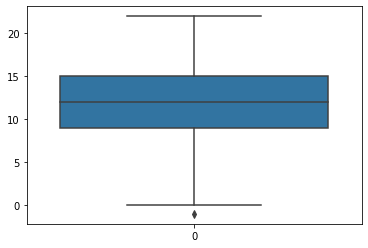

In [13]:
# To detect outliers:
sns.boxplot(data=data_225["tempC"])

q1 = pd.DataFrame(data_225["tempC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["tempC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 6.0
fence_low: 0.0
fence_high 24.0


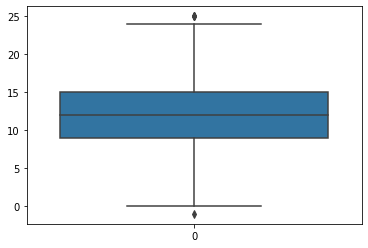

In [14]:
sns.boxplot(data=data_225["HeatIndexC"])

q1 = pd.DataFrame(data_225["HeatIndexC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["HeatIndexC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 7.0
fence_low: -2.5
fence_high 25.5


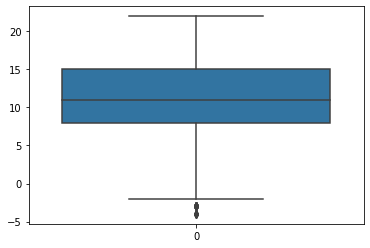

In [15]:
sns.boxplot(data=data_225["WindChillC"])

q1 = pd.DataFrame(data_225["WindChillC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["WindChillC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 7.0
fence_low: -2.5
fence_high 25.5


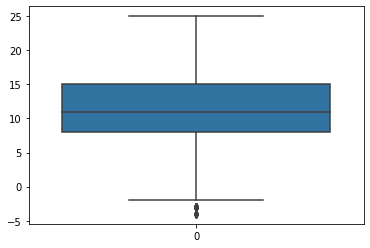

In [16]:
sns.boxplot(data=data_225["FeelsLikeC"])

q1 = pd.DataFrame(data_225["FeelsLikeC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["FeelsLikeC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 1.0
fence_low: 7.5
fence_high 11.5


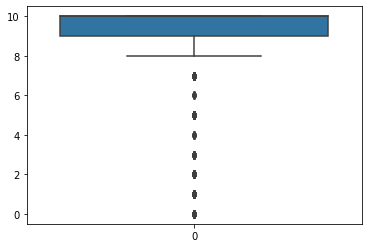

In [17]:
sns.boxplot(data=data_225["visibility"])

q1 = pd.DataFrame(data_225["visibility"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["visibility"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 5.0
fence_low: -0.5
fence_high 19.5


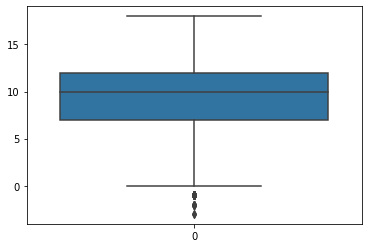

In [18]:
sns.boxplot(data=data_225["DewPointC"])

q1 = pd.DataFrame(data_225["DewPointC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["DewPointC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 9.0
fence_low: -4.5
fence_high 31.5


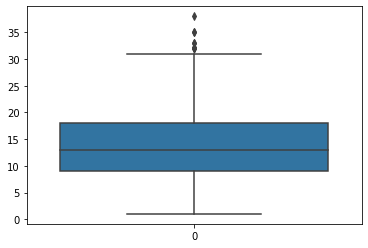

In [19]:
sns.boxplot(data=data_225["windspeedKmph"])

q1 = pd.DataFrame(data_225["windspeedKmph"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["windspeedKmph"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 5.0
fence_low: 5.5
fence_high 25.5


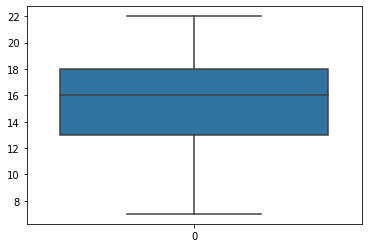

In [20]:
sns.boxplot(data=data_225["maxtempC"])

q1 = pd.DataFrame(data_225["maxtempC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["maxtempC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 1.0
fence_low: 1.5
fence_high 5.5


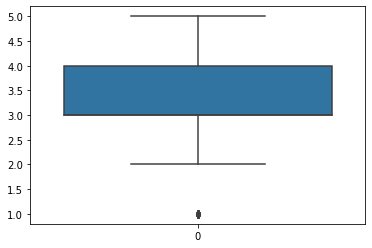

In [21]:
sns.boxplot(data=data_225["uvIndex"])

q1 = pd.DataFrame(data_225["uvIndex"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["uvIndex"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 3.0
fence_low: 8.3
fence_high 20.3


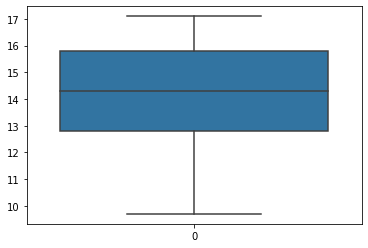

In [22]:
sns.boxplot(data=data_225["sunHour"])

q1 = pd.DataFrame(data_225["sunHour"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["sunHour"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 55.75
fence_low: -63.375
fence_high 159.625


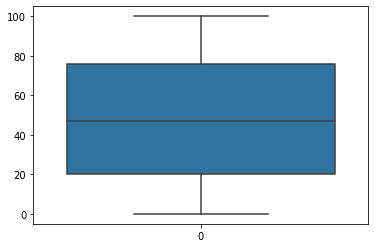

In [23]:
sns.boxplot(data=data_225["moon_illumination"])

q1 = pd.DataFrame(data_225["moon_illumination"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["moon_illumination"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 10.0
fence_low: 995.0
fence_high 1035.0


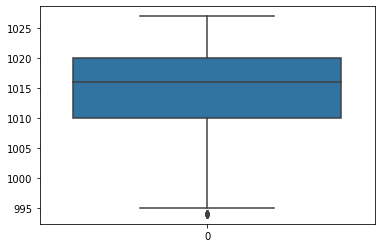

In [24]:
sns.boxplot(data=data_225["pressure"])

q1 = pd.DataFrame(data_225["pressure"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["pressure"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 0.0
fence_low: 0.0
fence_high 0.0


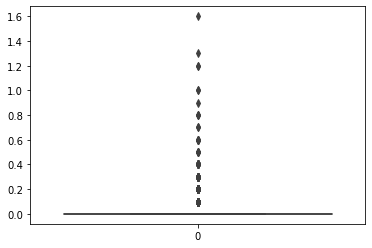

In [25]:
sns.boxplot(data=data_225["precipMM"])

q1 = pd.DataFrame(data_225["precipMM"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["precipMM"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 4.0
fence_low: 1.0
fence_high 17.0


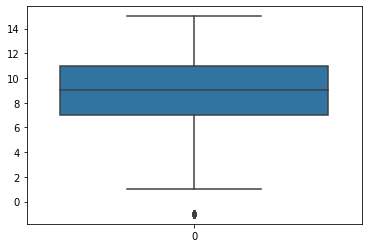

In [26]:
sns.boxplot(data=data_225["mintempC"])

q1 = pd.DataFrame(data_225["mintempC"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["mintempC"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 63.0
fence_low: -67.5
fence_high 184.5


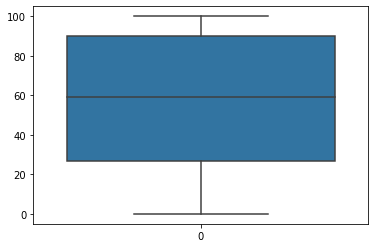

In [27]:
sns.boxplot(data=data_225["cloudcover"])

q1 = pd.DataFrame(data_225["cloudcover"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["cloudcover"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 155.0
fence_low: -129.5
fence_high 490.5


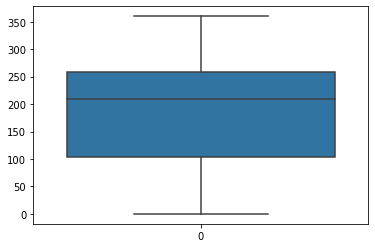

In [28]:
sns.boxplot(data=data_225["winddirDegree"])

q1 = pd.DataFrame(data_225["winddirDegree"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["winddirDegree"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 12.0
fence_low: -3.0
fence_high 45.0


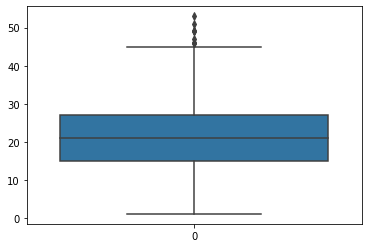

In [29]:
sns.boxplot(data=data_225["WindGustKmph"])

q1 = pd.DataFrame(data_225["WindGustKmph"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["WindGustKmph"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

iqr: 18.0
fence_low: 47.0
fence_high 119.0


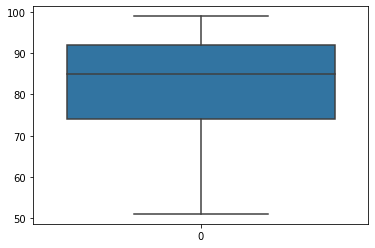

In [30]:
sns.boxplot(data=data_225["humidity"])

q1 = pd.DataFrame(data_225["humidity"]).quantile(0.25)[0]
q3 = pd.DataFrame(data_225["humidity"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

# Target variable analysis

In [31]:
#Statistics of target data
target_data = data_225['DMA_225'].describe()
target_data

count    2208.000000
mean        3.562107
std         1.638267
min         0.861250
25%         1.805750
50%         3.972250
75%         4.833500
max         8.916750
Name: DMA_225, dtype: float64

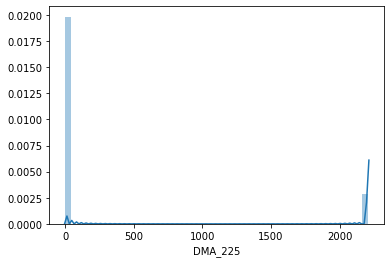

In [32]:
sns.distplot(target_data)

# Correlation of target variable with other variable:

#Numerical features and its relationship with the target variable "DMA_225"

In [33]:
# Getting the numerical features of the data :
numerical_features = data_225._get_numeric_data()
numerical_features.shape

(2208, 19)

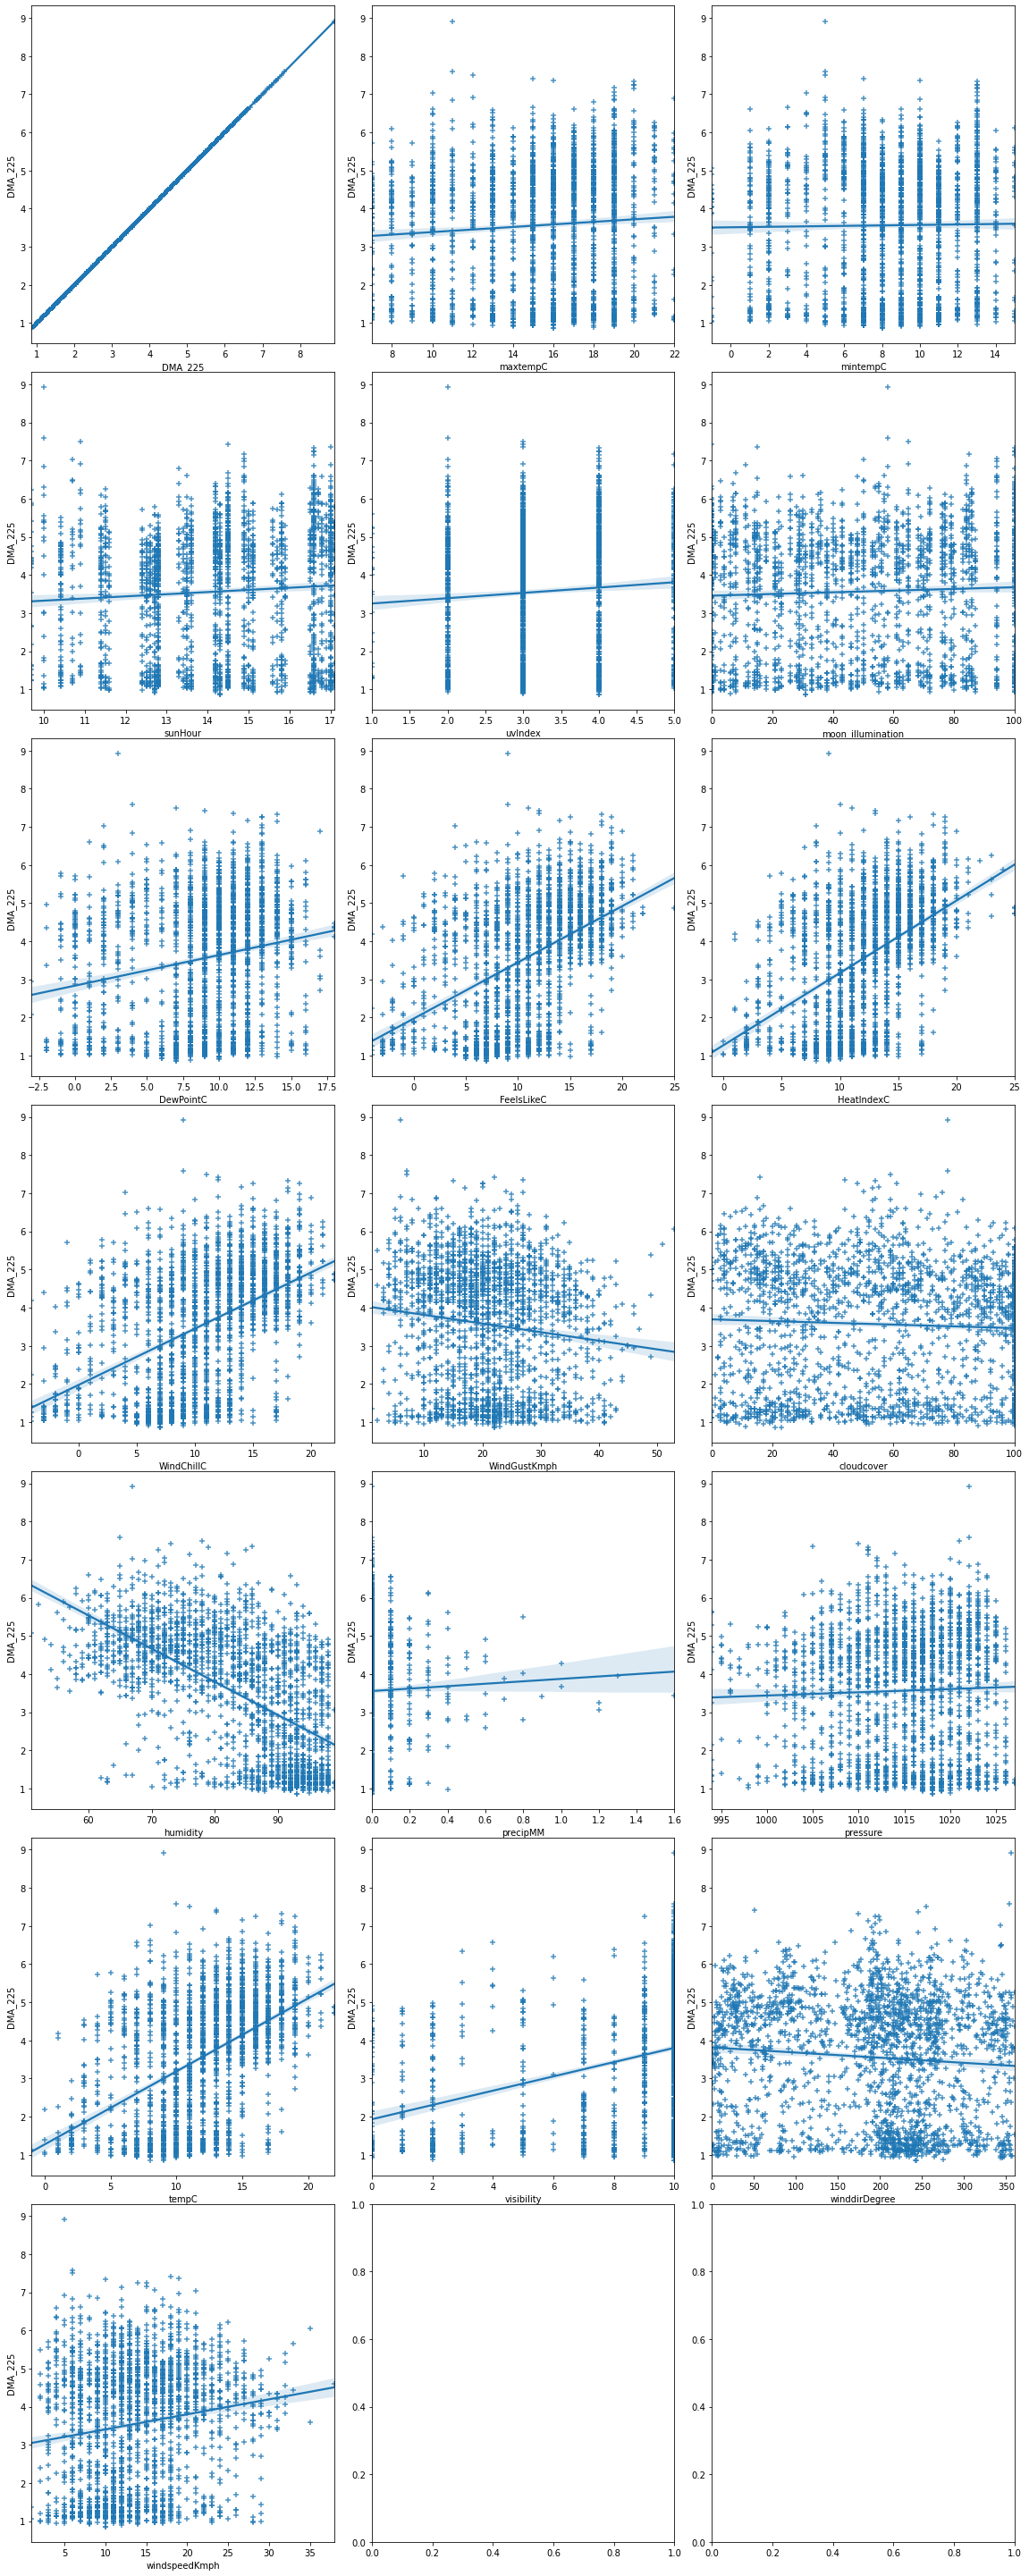

In [34]:
# There are 19 numerical features, fitting a 7x3 subplot in data set:
fig, axes = plt.subplots(7, 3, figsize=[16,40])
fig.tight_layout()
axes = np.ravel(axes)
for i, column in enumerate(numerical_features.columns):
    sns.regplot(column, "DMA_225", numerical_features, dropna=True, ax = axes[i], marker="+")

In [35]:
# Correlation test 
correlation = data_225.corr()
corr1 = correlation.sort_values("DMA_225",ascending=False)
corr1.DMA_225

DMA_225              1.000000
tempC                0.482207
HeatIndexC           0.480915
WindChillC           0.459637
FeelsLikeC           0.459543
visibility           0.316554
DewPointC            0.193987
windspeedKmph        0.148120
maxtempC             0.073080
uvIndex              0.072181
sunHour              0.067590
moon_illumination    0.042785
pressure             0.034621
precipMM             0.019481
mintempC             0.012935
cloudcover          -0.045243
winddirDegree       -0.080857
WindGustKmph        -0.120244
humidity            -0.580959
Name: DMA_225, dtype: float64

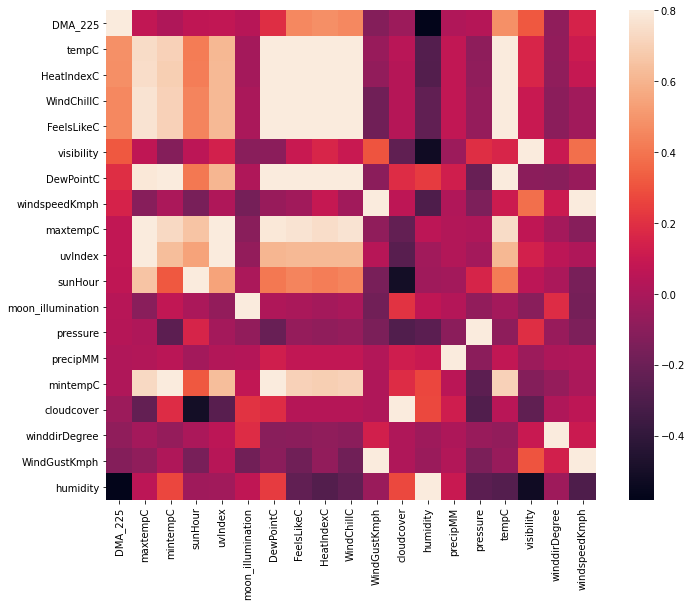

In [36]:
#Heatmap correlation
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr1, vmax=.8, square=True);

# Data visualisation


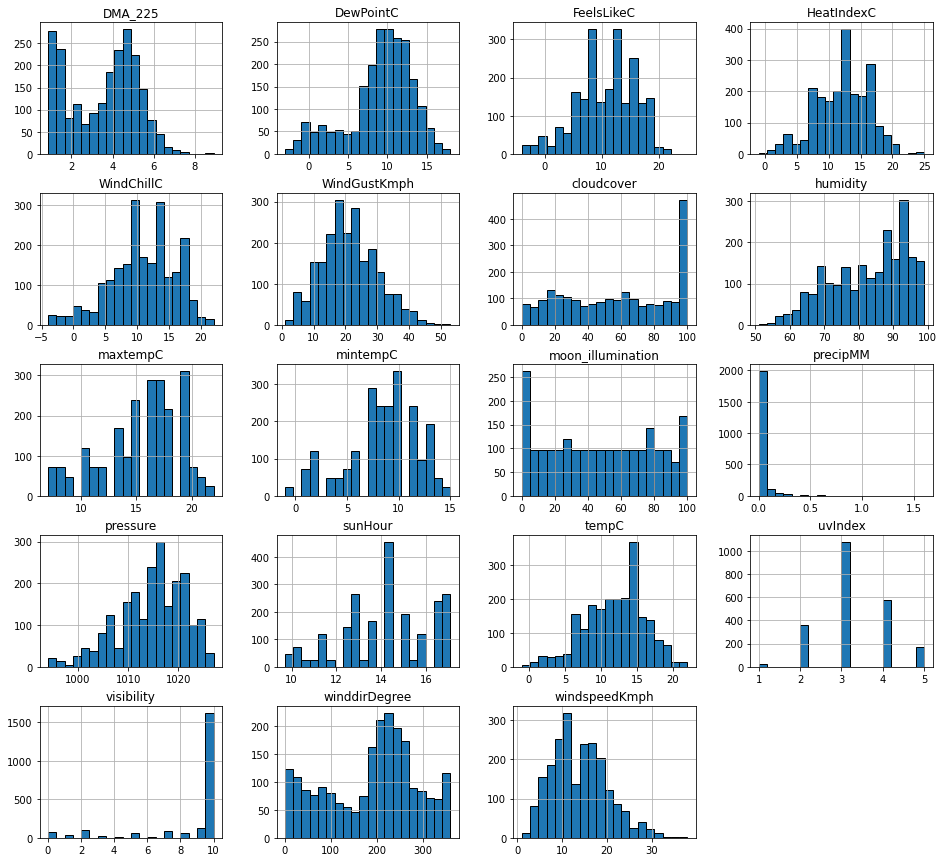

In [37]:
import matplotlib.pyplot as plt
data_225.hist(figsize=(16,15), edgecolor="black", bins=20)
plt.show()

# Checking the skewness and kurtosis of the target variable:

In [38]:
#Finding the skewness and kurtosis of data:
skewness = skew(data_225["DMA_225"])
kurtosis = kurtosis(data_225["DMA_225"])

In [39]:
print("Skewness of the data:" , skewness)
print("Kurtosis of the data:", kurtosis)

Skewness of the data: -0.15744851437702775
Kurtosis of the data: -1.1601927395987182


From the value we can figure outthat the data is moderatly skewed to the left, since its skewness is -0.1.The value of kurtosis seems to be fine.

In [40]:
# Finding mean and standard deviation:
mean = data_225["DMA_225"].describe()['mean']
SD = data_225["DMA_225"].describe()['std'] # deviation of data from mean
print("mean:", mean)
print("Standard deviation:" , SD)

mean: 3.562107336570879
Standard deviation: 1.6382670507206891


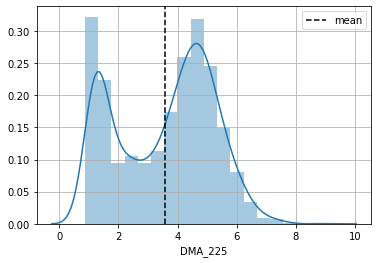

In [41]:
#plotting skewness 
sns.distplot(data_225["DMA_225"], norm_hist = True)
plt.axvline(x = mean, color = "black", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In [42]:
# We obtained normal distribution, by taking the log of it 
new_data = np.log1p(data_225["DMA_225"])
new_data.describe()

count    2208.000000
mean        1.441377
std         0.409044
min         0.621248
25%         1.031671
50%         1.603872
75%         1.763617
max         2.294225
Name: DMA_225, dtype: float64

In [43]:
mean_new_data = new_data.describe()["mean"]
std_new_data = new_data.describe()["std"]
print("mean:", mean_new_data)
print("standard deviation:", std_new_data)

mean: 1.4413774592454307
standard deviation: 0.40904387539590775


In [44]:
print("skewness of new_data:", new_data.skew())
print("kurtosis of new_data:", new_data.kurt())

skewness of new_data: -0.5479968011407842
kurtosis of new_data: -1.1346619588686613


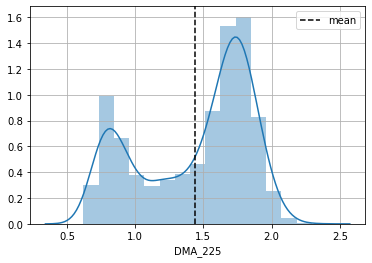

In [45]:
sns.distplot(new_data, norm_hist = True)
plt.axvline(x = mean_new_data, color = "black", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()